In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings; warnings.filterwarnings('ignore')


В архиве собраны данные о туристическом трафике абонентов МФ в некоторые
небольшие города РФ.
Задача: нужно определить, в каких городах нам наиболее уместно развивать сеть
(устанавливать новые БС или оптимизировать работу существующих).
Набор данных ограничен. Но на основе его исследования нужно сгенерировать гипотезы и
подкрепить данными.

Переменные:
Column_1 - лишнее, не анализировать
Snap_date - дата начала месяца туризма
Id_hash - id абонента. Один абонент может встречаться несколько раз в разных месяцах
или городах
days - продолжительность присутствия в днях в точке туризма
home_region - номер домашнего региона
city - точка туризма
gender - предсказанный моделью пол абонента
age - предсказанный моделью возраст абонента в годах
mou - голосовой трафик абонента за месяц (snap_date) в минутах
mou_out - исходящий голосовой трафик абонента за месяц в минутах
dou - интернет-трфик абонента за месяц, МБ
Interests - список интересов абонента за месяц snap_date
top_service - url, по которому у абонента больше всего трафика за месяц
volume_sum - трафик абонента за время присутствия в точке туризма, МБ
dl/ul_volume_sum - разложение volume_sum на uplink, downlink, МБ

#### 1 
Попробуем посмотреть отдельно данные по одному городу

In [3]:
data = pd.read_csv('D:/data/test_case1/DA_кейс/Данные_2021/Tourists_Абинск_2021.csv', sep=',')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

snap_date                           id_hash  days  home_region  \
0      2021.07.01  61fc25d86364a6a5d6e85319bcf7aef5     3           77   
1      2021.07.01  c42fc8d3ad95a2e006567967814463a3    15           61   
2      2021.07.01  ce99dc79821948d73c0d2ab2d9eee25d     5           34   
3      2021.07.01  02db2c7539fb8a552f48b42e3096151f    11           72   
4      2021.07.01  d3fd4dd683cf977fabbf8804d4006dfe     1            7   
...           ...                               ...   ...          ...   
55043  2021.12.01  483bd8549e39af74c3104ae3e7ea3afa     1           46   
55044  2021.12.01  767acc39d873b28e7d4da771b88546a0    12           61   
55045  2021.12.01  767acc39d873b28e7d4da771b88546a0    12           61   
55046  2021.12.01  c1f6ee796f3b7ab96501d34947d3bf4e     7           71   
55047  2021.12.01  c1f6ee796f3b7ab96501d34947d3bf4e     7           71   

       tourists_region    city  gender  age          mou      mou_out  \
0                   23  Абинск       1   47    33.512500          NaN   
1                   23  Абинск       2   28  1738.257600  1029.315000   
2                   23  Абинск       1   36   326.655000   173.512500   
3                   23  Абинск       2   34   165.549990    39.917496   
4                   23  Абинск       2   33  1355.112500   469.910000   
...                ...     ...     ...  ...          ...          ...   
55043               23  Абинск       1   33   250.092500    95.095000   
55044               23  Абинск       2   48     9.135000          NaN   
55045               23  Абинск       2   48     9.135000          NaN   
55046               23  Абинск       1   25    15.819999     4.357500   
55047               23  Абинск       1   25    15.819999     4.357500   

                dou  
0          8.053427  
1      46874.117000  
2      31097.098000  
3       2390.938200  
4        600.361100  
...             ...  
55043  18045.334000  
55044           NaN  
55045           NaN  
55046  47604.055000  
55047  47604.055000  

[55048 rows x 11 columns]

Заполним пропуски медианными значениями, сначала группируем как можно больше признаков, чтобы медианное значение было наиболее характерным. Затем уменьшаем количество параметров группировки, чтобы заполнить оставшиеся пустые значения медианным значением более обобщенной группы 

In [5]:
# Список группируемых столбцов
group_columns_list = [['days', 'city', 'age', 'gender'],
                      ['city', 'age', 'gender'],
                      ['city']]

# Итерация по различным комбинациям группируемых столбцов
for group_cols in group_columns_list:
    data['mou'] = data.groupby(group_cols)['mou'].transform(lambda x: x.fillna(x.median()))
    data['mou_out'] = data.groupby(group_cols)['mou_out'].transform(lambda x: x.fillna(x.median()))
    data['dou'] = data.groupby(group_cols)['dou'].transform(lambda x: x.fillna(x.median()))

data

C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

snap_date                           id_hash  days  home_region  \
0      2021.07.01  61fc25d86364a6a5d6e85319bcf7aef5     3           77   
1      2021.07.01  c42fc8d3ad95a2e006567967814463a3    15           61   
2      2021.07.01  ce99dc79821948d73c0d2ab2d9eee25d     5           34   
3      2021.07.01  02db2c7539fb8a552f48b42e3096151f    11           72   
4      2021.07.01  d3fd4dd683cf977fabbf8804d4006dfe     1            7   
...           ...                               ...   ...          ...   
55043  2021.12.01  483bd8549e39af74c3104ae3e7ea3afa     1           46   
55044  2021.12.01  767acc39d873b28e7d4da771b88546a0    12           61   
55045  2021.12.01  767acc39d873b28e7d4da771b88546a0    12           61   
55046  2021.12.01  c1f6ee796f3b7ab96501d34947d3bf4e     7           71   
55047  2021.12.01  c1f6ee796f3b7ab96501d34947d3bf4e     7           71   

       tourists_region    city  gender  age          mou      mou_out  \
0                   23  Абинск       1   47    33.512500   227.430000   
1                   23  Абинск       2   28  1738.257600  1029.315000   
2                   23  Абинск       1   36   326.655000   173.512500   
3                   23  Абинск       2   34   165.549990    39.917496   
4                   23  Абинск       2   33  1355.112500   469.910000   
...                ...     ...     ...  ...          ...          ...   
55043               23  Абинск       1   33   250.092500    95.095000   
55044               23  Абинск       2   48     9.135000   152.477505   
55045               23  Абинск       2   48     9.135000   152.477505   
55046               23  Абинск       1   25    15.819999     4.357500   
55047               23  Абинск       1   25    15.819999     4.357500   

                dou  
0          8.053427  
1      46874.117000  
2      31097.098000  
3       2390.938200  
4        600.361100  
...             ...  
55043  18045.334000  
55044   1987.270100  
55045   1987.270100  
55046  47604.055000  
55047  47604.055000  

[55048 rows x 11 columns]

Преобразуем формат даты 

In [14]:
# Преобразование столбца 'date' в формат даты
data['date'] = pd.to_datetime(data['snap_date'])
data.drop('snap_date', axis=1, inplace=True)


# Создание новых столбцов с годом, месяцем и днем
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [19]:
data

id_hash  days  home_region  tourists_region  \
0      61fc25d86364a6a5d6e85319bcf7aef5     3           77               23   
1      c42fc8d3ad95a2e006567967814463a3    15           61               23   
2      ce99dc79821948d73c0d2ab2d9eee25d     5           34               23   
3      02db2c7539fb8a552f48b42e3096151f    11           72               23   
4      d3fd4dd683cf977fabbf8804d4006dfe     1            7               23   
...                                 ...   ...          ...              ...   
55043  483bd8549e39af74c3104ae3e7ea3afa     1           46               23   
55044  767acc39d873b28e7d4da771b88546a0    12           61               23   
55045  767acc39d873b28e7d4da771b88546a0    12           61               23   
55046  c1f6ee796f3b7ab96501d34947d3bf4e     7           71               23   
55047  c1f6ee796f3b7ab96501d34947d3bf4e     7           71               23   

         city  gender  age          mou      mou_out           dou       date  \
0      Абинск       1   47    33.512500   227.430000      8.053427 2021-07-01   
1      Абинск       2   28  1738.257600  1029.315000  46874.117000 2021-07-01   
2      Абинск       1   36   326.655000   173.512500  31097.098000 2021-07-01   
3      Абинск       2   34   165.549990    39.917496   2390.938200 2021-07-01   
4      Абинск       2   33  1355.112500   469.910000    600.361100 2021-07-01   
...       ...     ...  ...          ...          ...           ...        ...   
55043  Абинск       1   33   250.092500    95.095000  18045.334000 2021-12-01   
55044  Абинск       2   48     9.135000   152.477505   1987.270100 2021-12-01   
55045  Абинск       2   48     9.135000   152.477505   1987.270100 2021-12-01   
55046  Абинск       1   25    15.819999     4.357500  47604.055000 2021-12-01   
55047  Абинск       1   25    15.819999     4.357500  47604.055000 2021-12-01   

       year  month  day  
0      2021      7    1  
1      2021      7    1  
2      2021      7    1  
3      2021      7    1  
4      2021      7    1  
...     ...    ...  ...  
55043  2021     12    1  
55044  2021     12    1  
55045  2021     12    1  
55046  2021     12    1  
55047  2021     12    1  

[55048 rows x 14 columns]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55048 entries, 0 to 55047
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_hash          55048 non-null  object        
 1   days             55048 non-null  int64         
 2   home_region      55048 non-null  int64         
 3   tourists_region  55048 non-null  int64         
 4   city             55048 non-null  object        
 5   gender           55048 non-null  int64         
 6   age              55048 non-null  int64         
 7   mou              55048 non-null  float64       
 8   mou_out          55048 non-null  float64       
 9   dou              55048 non-null  float64       
 10  date             55048 non-null  datetime64[ns]
 11  year             55048 non-null  int32         
 12  month            55048 non-null  int32         
 13  day              55048 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int3

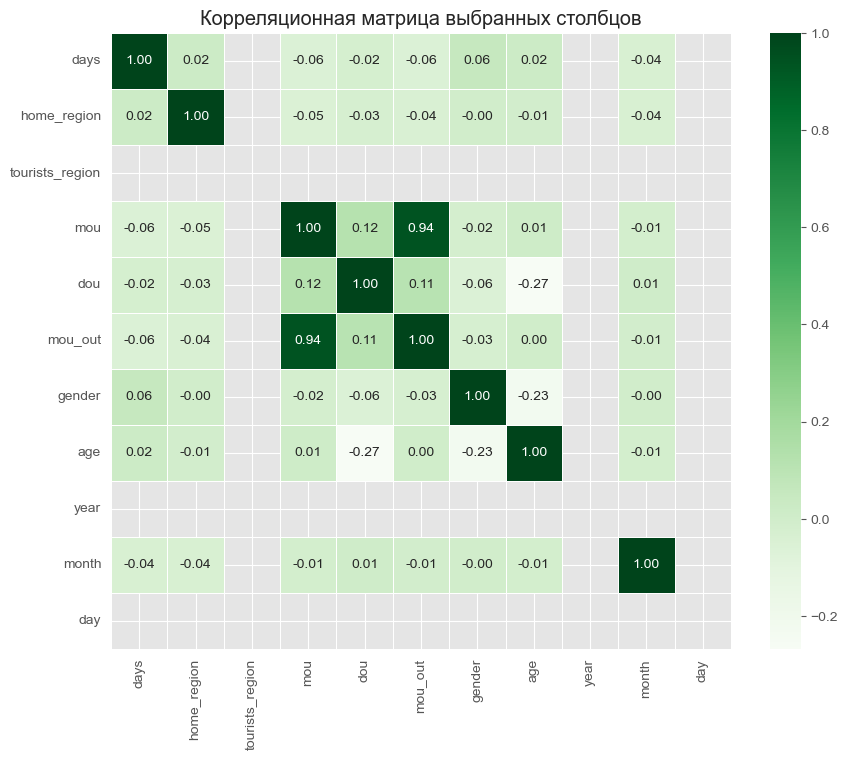

In [21]:
selected_columns = ['days', 'home_region', 'tourists_region', 'mou', 'dou', 'mou_out', 'gender', 'age',
                    'year','month', 'day']


# Создание подмножества датафрейма только с выбранными столбцами
selected_dataframe = data[selected_columns]

# Вычисление корреляционной матрицы для подмножества столбцов
corr_matrix_df = selected_dataframe.corr()

# Построение тепловой карты
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))  # Регулирование размера фигуры
sns.heatmap(corr_matrix_df, annot=True, cmap="Greens", fmt=".2f", linewidths=.5)
plt.title('Корреляционная матрица выбранных столбцов')
plt.show()

Построили корреляционную матрицу, по ней можем сказать что данные не коррелируют вообще (черные столбцы - вообще отсутствует корреляция).
MOU и MOU_OUT - логично что коррелируют по определению данных.
Важно отметить, что согласно данной матрице корреляции у нас трафик интернета абонента и количество минут не коррелируют, поэтому предполагаю что надо будет проверить на максимумы и голосовой трафик и интернет трафик

In [88]:
# for column in data.columns:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data[column], kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

Итак, наша задача: нужно определить, в каких городах нам наиболее уместно развивать сеть (устанавливать новые БС или оптимизировать работу существующих).

Планирование сетей - задача на которую влияют многие факторы, но мы предполагаем, что основной - количество трафика в первую очередь. (Traffic Models: User traffic distribution is a main factor that ultimately determines the cellular system plan and, hence, is a key input in the CP process (https://ieeexplore.ieee.org/abstract/document/7883847) 

Поэтому предполагаем что надо посмотреть медианное значение по городам, и построить графики.





In [22]:
#считаем данные в датафрейм
def read_csv_files_into_dataframe(folder_path):
    # Получаем список всех файлов в указанной папке
    file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Создаем пустой DataFrame
    combined_df = pd.DataFrame()

    # Читаем каждый CSV файл и добавляем его в единый DataFrame
    for file in file_list:
        df = pd.read_csv(file)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df

folder_path = "D:/data/test_case1/DA_кейс/Данные_2021/"
combined_dataframe = read_csv_files_into_dataframe(folder_path)

# Выводим общее количество строк и столбцов в объединенном датасете
print("Total Rows:", len(combined_dataframe))
print("Total Columns:", len(combined_dataframe.columns))



Total Rows: 3884691
Total Columns: 12


In [23]:
combined_dataframe.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
# Преобразование столбца 'date' в формат даты
combined_dataframe['date'] = pd.to_datetime(combined_dataframe['snap_date'])
combined_dataframe.drop('snap_date', axis=1, inplace=True)


# Создание новых столбцов с годом, месяцем и днем
combined_dataframe['year'] = combined_dataframe['date'].dt.year
combined_dataframe['month'] = combined_dataframe['date'].dt.month
combined_dataframe['day'] = combined_dataframe['date'].dt.day

In [68]:
# заполним пропуски медианными значениями по группе
# Список группируемых столбцов
group_columns_list = [['days', 'city', 'age', 'gender'],
                      ['city', 'age', 'gender'],
                      ['city']]

# Итерация по различным комбинациям группируемых столбцов
for group_cols in group_columns_list:
    combined_dataframe['mou'] = combined_dataframe.groupby(group_cols)['mou'].transform(lambda x: x.fillna(x.median()))
    combined_dataframe['mou_out'] = combined_dataframe.groupby(group_cols)['mou_out'].transform(lambda x: x.fillna(x.median()))
    combined_dataframe['dou'] = combined_dataframe.groupby(group_cols)['dou'].transform(lambda x: x.fillna(x.median()))

In [28]:
combined_dataframe

days  home_region  tourists_region            city  gender  age  \
0           3           77               23          Абинск       1   47   
1          15           61               23          Абинск       2   28   
2           5           34               23          Абинск       1   36   
3          11           72               23          Абинск       2   34   
4           1            7               23          Абинск       2   33   
...       ...          ...              ...             ...     ...  ...   
3884686     8           37               33  Юрьев-Польский       1   23   
3884687    15           37               33  Юрьев-Польский       1   37   
3884688    15           37               33  Юрьев-Польский       1   37   
3884689     2           61               33  Юрьев-Польский       3    0   
3884690     4           77               33  Юрьев-Польский       3    0   

                 mou      mou_out           dou  month  
0          33.512500   227.430000      8.053427      7  
1        1738.257600  1029.315000  46874.117000      7  
2         326.655000   173.512500  31097.098000      7  
3         165.549990    39.917496   2390.938200      7  
4        1355.112500   469.910000    600.361100      7  
...              ...          ...           ...    ...  
3884686    70.857506    35.577500   6271.548300     12  
3884687   328.912500    85.295006  41689.750000     12  
3884688   328.912500    85.295006  41689.750000     12  
3884689   964.459960   462.315000    444.645260     12  
3884690   300.720000   138.127500   8117.863000     12  

[3884691 rows x 10 columns]

In [27]:
combined_dataframe.drop('id_hash', axis=1, inplace=True)
combined_dataframe.drop('date', axis=1, inplace=True)
combined_dataframe.drop('day', axis=1, inplace=True)
combined_dataframe.drop('year', axis=1, inplace=True)


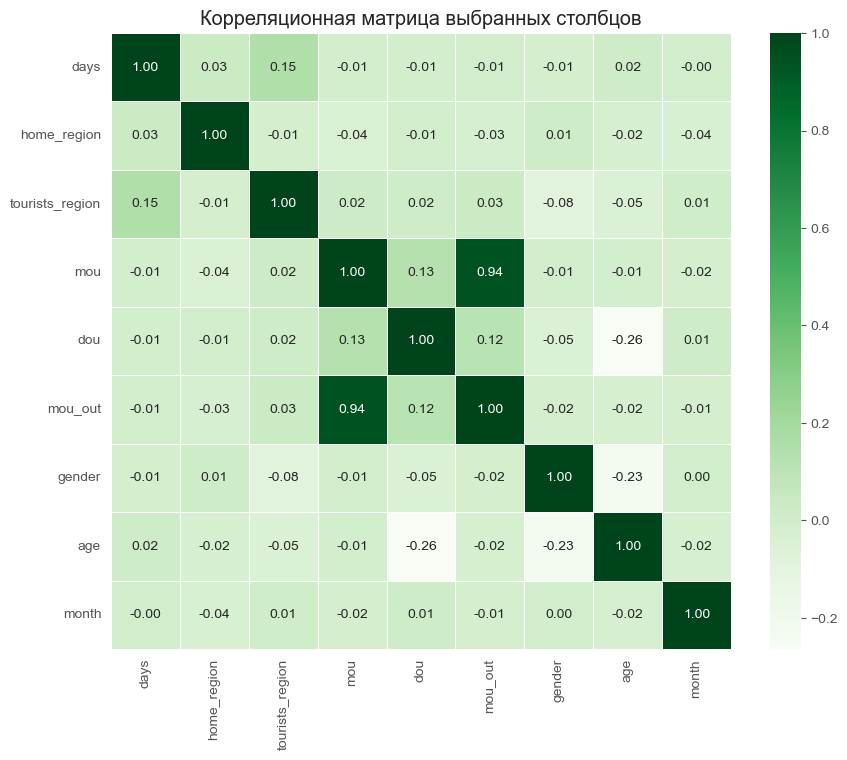

In [29]:
selected_columns = ['days', 'home_region', 'tourists_region', 'mou', 'dou', 'mou_out', 'gender', 'age',
                    'month']


# Создание подмножества датафрейма только с выбранными столбцами
selected_dataframe = combined_dataframe[selected_columns]

# Вычисление корреляционной матрицы для подмножества столбцов
corr_matrix_df = selected_dataframe.corr()

# Построение тепловой карты
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))  # Регулирование размера фигуры
sns.heatmap(corr_matrix_df, annot=True, cmap="Greens", fmt=".2f", linewidths=.5)
plt.title('Корреляционная матрица выбранных столбцов')
plt.show()

In [30]:
combined_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3884691 entries, 0 to 3884690
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   days             int64  
 1   home_region      int64  
 2   tourists_region  int64  
 3   city             object 
 4   gender           int64  
 5   age              int64  
 6   mou              float64
 7   mou_out          float64
 8   dou              float64
 9   month            int32  
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 281.6+ MB


In [8]:
combined_dataframe.columns

Index(['snap_date', 'id_hash', 'days', 'home_region', 'tourists_region',
       'city', 'gender', 'age', 'mou', 'mou_out', 'dou'],
      dtype='object')

In [33]:
mou_median_by_city = combined_dataframe.groupby('city')['mou'].median()
mou_median_by_city


city
Абинск                318.185000
Александров           297.955000
Армавир               433.177500
Байкальск             312.961260
Белореченск           311.535000
Вязники               350.140000
Горно-Алтайск         292.372500
Городищи              274.242500
Гороховец             323.592500
Горячий Ключ          255.010010
Гулькевичи            441.148750
Ейск                  248.202500
Ковров                308.455000
Кольчугино            305.917500
Кореновск             350.122500
Кропоткин             377.002500
Крымск                273.472490
Курганинск            263.961250
Лабинск               341.232500
Лакинск               347.952480
Меленки               387.992500
Муром                 312.602500
Новокубанск           332.535000
Петушки               363.195000
Покров                339.832500
Сириус                317.362500
Славянск-на-Кубани    311.447500
Сортавала             284.873750
Струнино              310.371260
Темрюк                283.500000
Тимаш

In [39]:
# Сортировка медианных значений трафика mou 
mou_median_by_city_sorted = mou_median_by_city.sort_values()

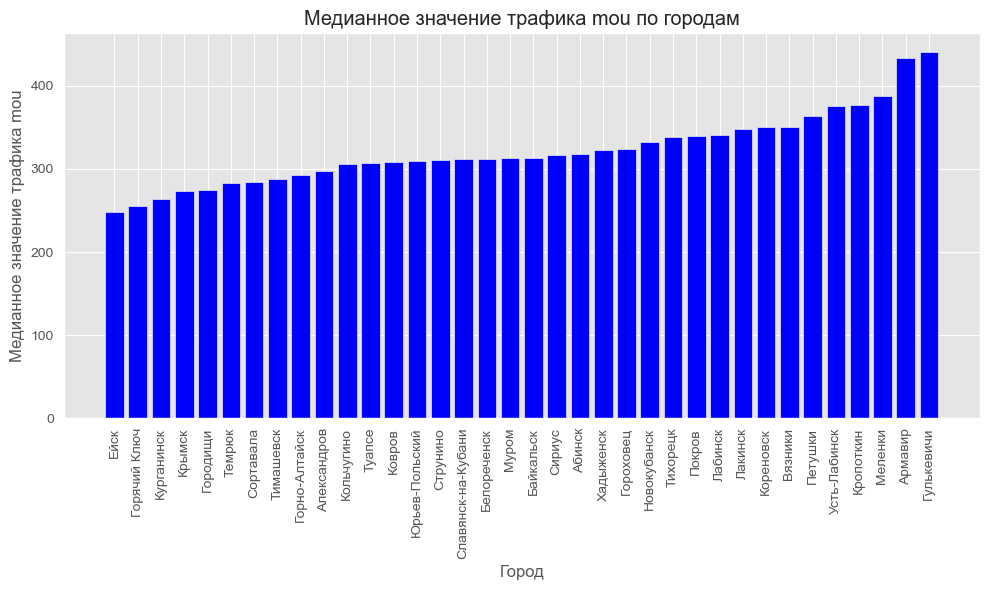

In [41]:
# Построение гистограммы для медианных значений трафика mou
plt.figure(figsize=(10, 6))
plt.bar(mou_median_by_city_sorted.index, mou_median_by_city_sorted.values, color='blue')
plt.xlabel('Город')
plt.ylabel('Медианное значение трафика mou')
plt.title('Медианное значение трафика mou по городам')
plt.xticks(rotation=90)  # Поворот меток по оси X для лучшей читаемости
plt.tight_layout()
plt.show()

In [69]:
mou_median_by_city_sorted[-4:]

city
Кропоткин     377.00250
Меленки       387.99250
Армавир       433.17750
Гулькевичи    441.14875
Name: mou, dtype: float64

In [70]:
dou_median_by_city = combined_dataframe.groupby('city')['dou'].median()
dou_median_by_city

city
Абинск                6257.31400
Александров           5899.06625
Армавир               8068.37840
Байкальск             6333.23000
Белореченск           5135.26440
Вязники               6952.26300
Горно-Алтайск         7917.46465
Городищи              5613.38800
Гороховец             5700.69200
Горячий Ключ          3845.83520
Гулькевичи            7891.37550
Ейск                  4668.79675
Ковров                6349.13000
Кольчугино            6201.71530
Кореновск             6758.79800
Кропоткин             6493.94140
Крымск                4760.30130
Курганинск            3951.69850
Лабинск               4997.81250
Лакинск               6986.37600
Меленки               6202.03015
Муром                 6204.01985
Новокубанск           4864.86700
Петушки               7657.23800
Покров                7101.31435
Сириус                6228.28300
Славянск-на-Кубани    5797.00395
Сортавала             5154.30150
Струнино              6135.45135
Темрюк                5042.25490
Тимаш

In [71]:
dou_median_by_city_sorted = dou_median_by_city.sort_values()


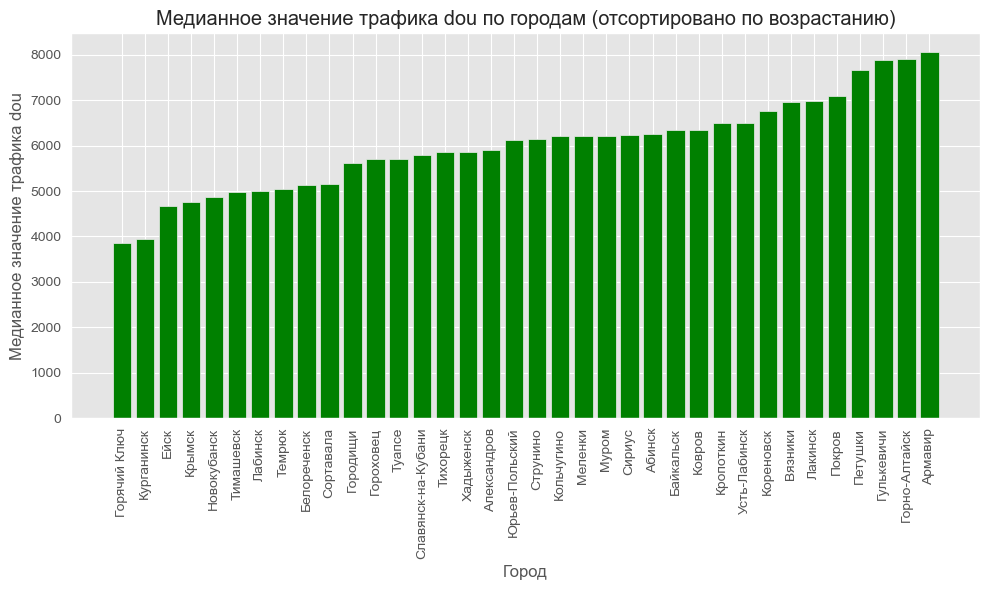

In [72]:
# Построение гистограммы для медианных значений трафика dou
plt.figure(figsize=(10, 6))
plt.bar(dou_median_by_city_sorted.index, dou_median_by_city_sorted.values, color='green')
plt.xlabel('Город')
plt.ylabel('Медианное значение трафика dou')
plt.title('Медианное значение трафика dou по городам (отсортировано по возрастанию)')
plt.xticks(rotation=90)  # Поворот меток по оси X для лучшей читаемости
plt.tight_layout()
plt.show()

У нас есть отсортированные гистограммы с трафиком звонков и с интернет траффиком.
Причем судя по гистограмме трафика звонков у нас есть разрыв между первыми 2 городами - Армавир и Гулькевичи и остальными, а по гистограмме интернет трафика у нас явно выделяются первые 4 города, в которые Армавир и Гулькевичи входят. Поэтому выберем эти 4 города и посмотрим трафик по городам помесячно

In [73]:
chosen_cities = dou_median_by_city_sorted[-4:].index.tolist()
chosen_cities

['Петушки', 'Гулькевичи', 'Горно-Алтайск', 'Армавир']

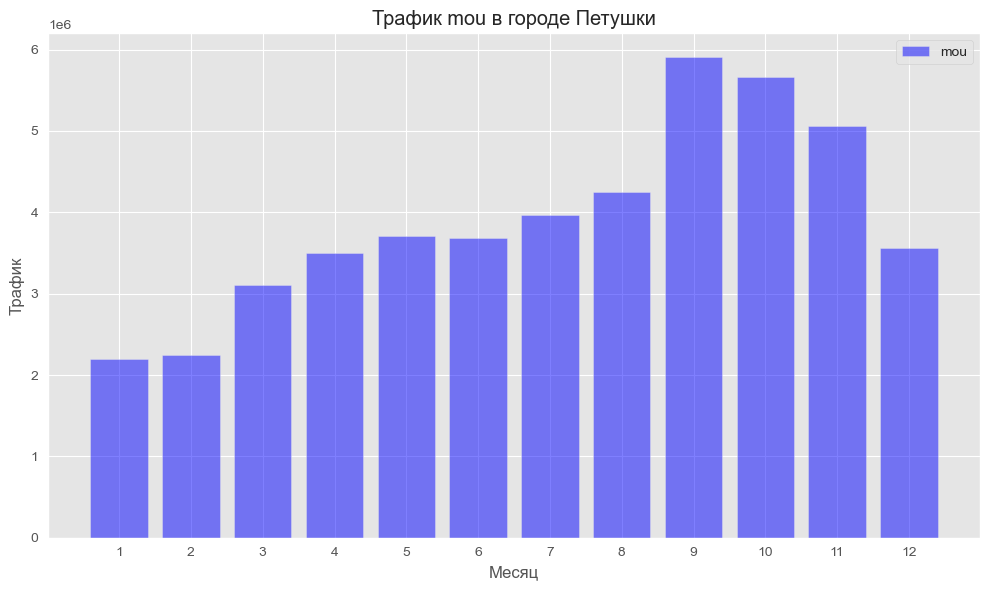

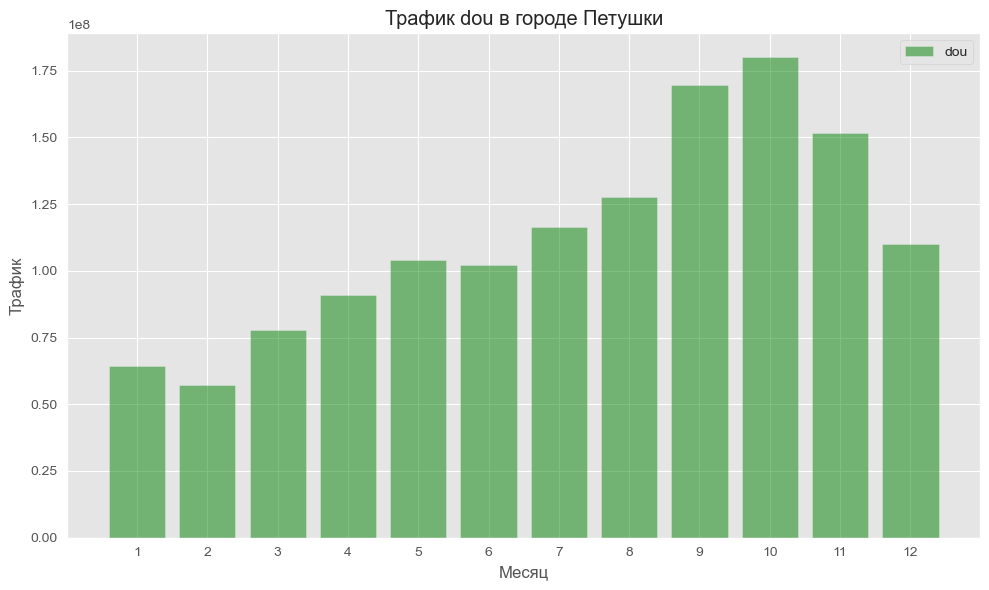

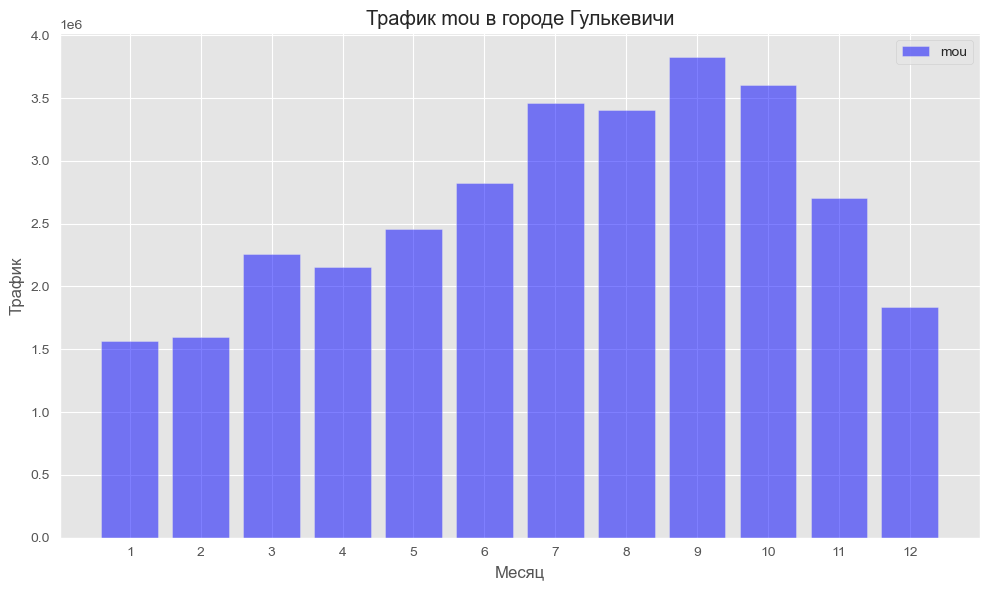

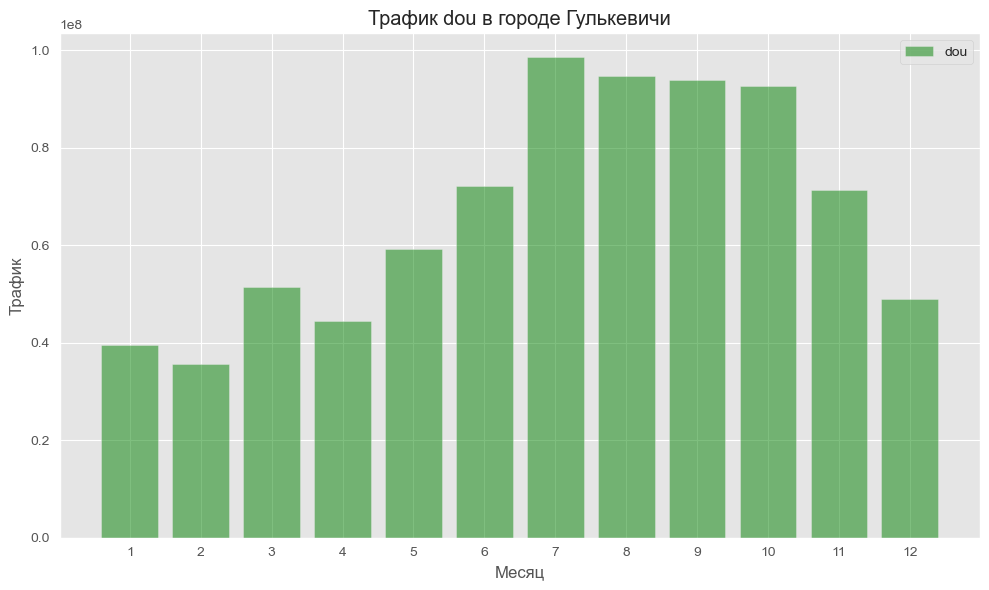

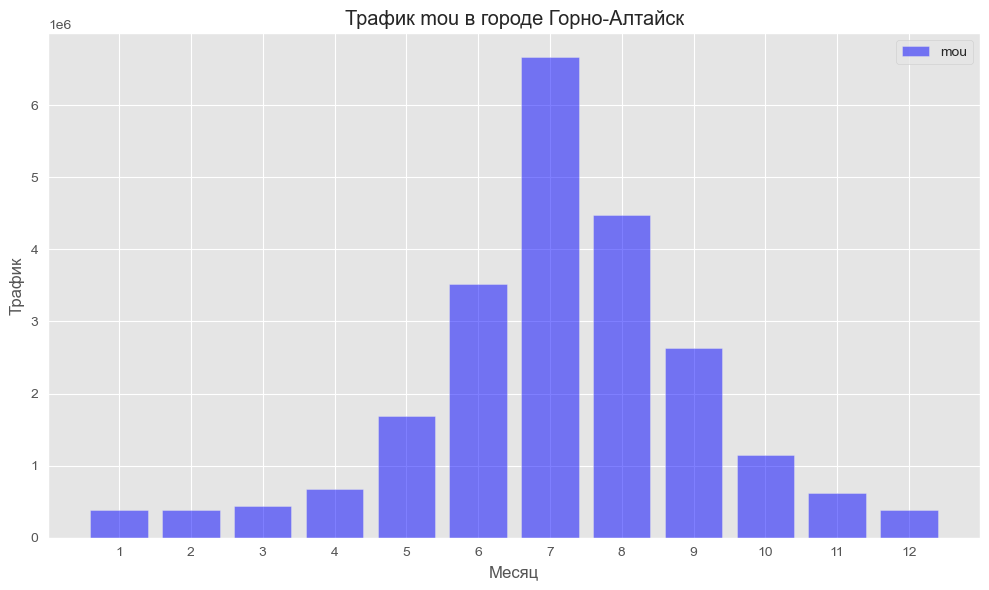

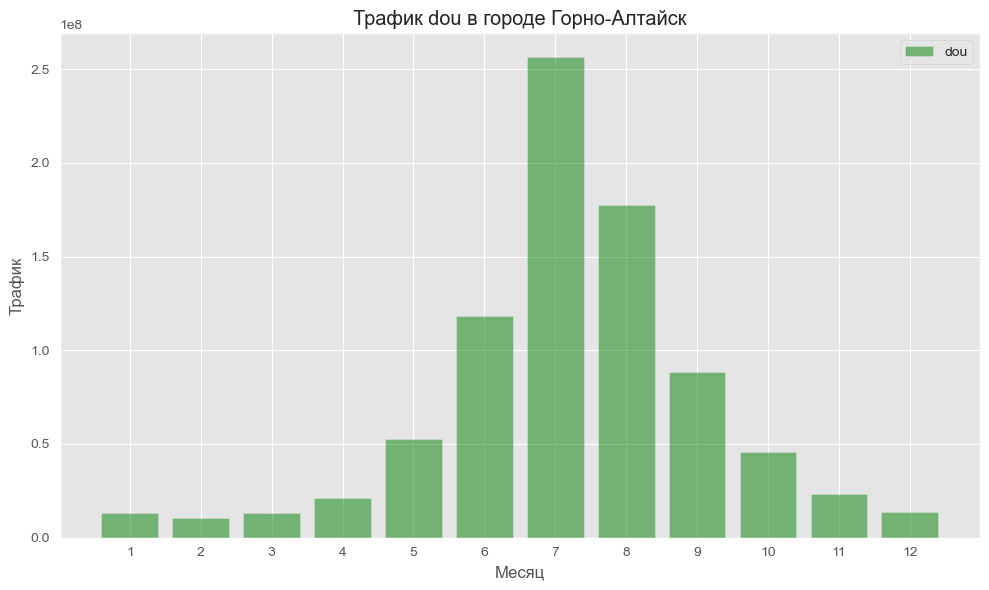

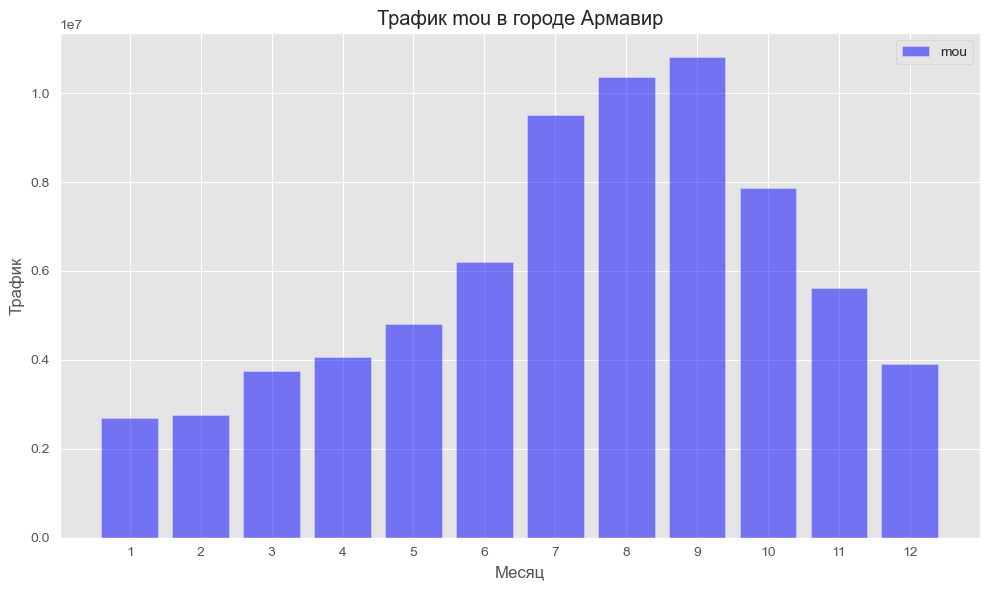

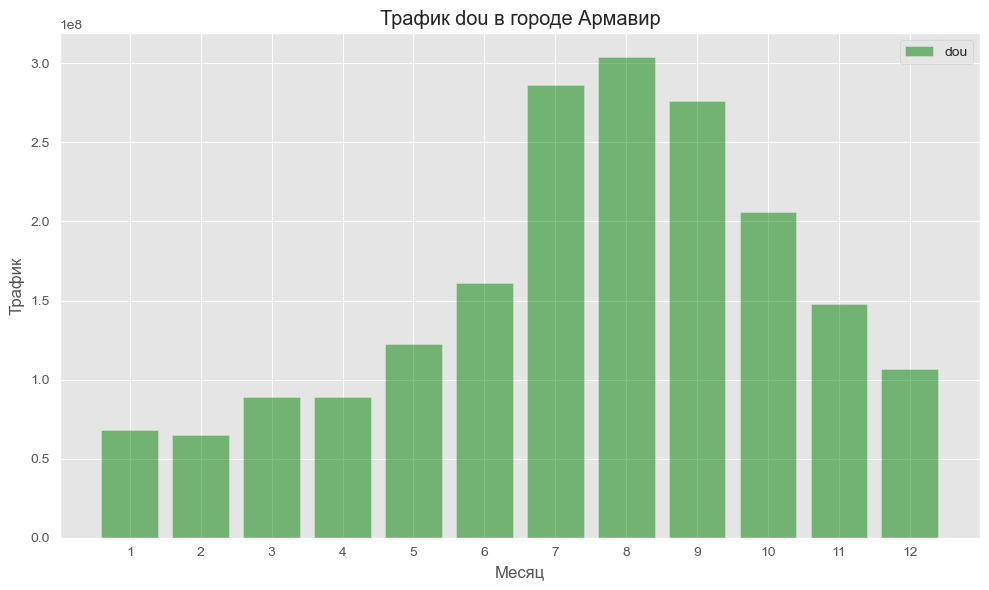

In [96]:
# Фильтруем исходный DataFrame по выбранным городам
chosen_cities_df = combined_dataframe[combined_dataframe['city'].isin(chosen_cities)]

# Группируем данные по городу и месяцу для трафика mou
mou_grouped = chosen_cities_df.groupby(['city', 'month'])['mou'].sum().reset_index()

# Группируем данные по городу и месяцу для трафика dou
dou_grouped = chosen_cities_df.groupby(['city', 'month'])['dou'].sum().reset_index()

# Строим отдельные графики для каждого города
for city in chosen_cities:
    city_mou = mou_grouped[mou_grouped['city'] == city]
    city_dou = dou_grouped[dou_grouped['city'] == city]

    plt.figure(figsize=(10, 6))

    # Строим гистограмму для трафика mou
    plt.bar(city_mou['month'], city_mou['mou'], color='blue', alpha=0.5, label='mou')

    plt.xlabel('Месяц')
    plt.ylabel('Трафик')
    plt.title(f'Трафик mou в городе {city}')

    plt.xticks(city_mou['month'])  # Устанавливаем метки на оси X для каждого месяца

    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))

    # Строим гистограмму для трафика dou
    plt.bar(city_dou['month'], city_dou['dou'], color='green', alpha=0.5, label='dou')

    plt.xlabel('Месяц')
    plt.ylabel('Трафик')
    plt.title(f'Трафик dou в городе {city}')

    plt.xticks(city_dou['month'])  # Устанавливаем метки на оси X для каждого месяца

    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [75]:
folder_path = "D:/data/test_case1/DA_кейс/Данные_2022/"
combined_dataframe_2 = read_csv_files_into_dataframe(folder_path)

# Выводим общее количество строк и столбцов в объединенном датасете
print("Total Rows:", len(combined_dataframe_2))
print("Total Columns:", len(combined_dataframe_2.columns))


Total Rows: 3818880
Total Columns: 17


In [76]:
combined_dataframe_2.drop('Unnamed: 0', axis=1, inplace=True)
combined_dataframe_2.drop('id_hash', axis=1, inplace=True)

# Преобразование столбца 'date' в формат даты
combined_dataframe_2['date'] = pd.to_datetime(combined_dataframe_2['snap_date'])
combined_dataframe_2.drop('snap_date', axis=1, inplace=True)

# Создание новых столбцов с годом, месяцем и днем
combined_dataframe_2['year'] = combined_dataframe_2['date'].dt.year
combined_dataframe_2['month'] = combined_dataframe_2['date'].dt.month
combined_dataframe_2['day'] = combined_dataframe_2['date'].dt.day
# заполним пропуски медианными значениями по группе
# Список группируемых столбцов
group_columns_list = [['days', 'city', 'age', 'gender'],
                      ['city', 'age', 'gender'],
                      ['city']]

# Итерация по различным комбинациям группируемых столбцов
for group_cols in group_columns_list:
    combined_dataframe_2['mou'] = combined_dataframe_2.groupby(group_cols)['mou'].transform(lambda x: x.fillna(x.median()))
    combined_dataframe_2['mou_out'] = combined_dataframe_2.groupby(group_cols)['mou_out'].transform(
        lambda x: x.fillna(x.median()))
    combined_dataframe_2['dou'] = combined_dataframe_2.groupby(group_cols)['dou'].transform(lambda x: x.fillna(x.median()))

C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

In [83]:
combined_dataframe_2

days  home_region  tourists_region            city  gender  age  \
0           7            9               23          Абинск       2   51   
1           8            3               23          Абинск       2   31   
2          12           43               23          Абинск       1   48   
3           9           63               23          Абинск       2   40   
4           7           61               23          Абинск       3   39   
...       ...          ...              ...             ...     ...  ...   
3818875     9           37               33  Юрьев-Польский       1   32   
3818876     7           77               33  Юрьев-Польский       1   41   
3818877     1           52               33  Юрьев-Польский       1   36   
3818878    15           37               33  Юрьев-Польский       1   27   
3818879    19           37               33  Юрьев-Польский       1   26   

                 mou     mou_out          dou  \
0         494.322480  298.847500   7932.82470   
1         329.349980  206.412490   2366.39140   
2         334.232500  132.650010   2604.36820   
3         171.045000  142.135010   1827.84390   
4         367.395000  224.630000  31482.02700   
...              ...         ...          ...   
3818875  1503.110000  799.365000   7869.65040   
3818876  1500.380000  693.490000  10923.86700   
3818877   948.920000  705.635000   8897.45100   
3818878     4.742499    4.742499    953.58044   
3818879    50.452500   25.532500   2657.19630   

                                                 interests   top_service  \
0        [Контент на тему путешествий, Email-клиенты, П...    [existing]   
1        [Активный отдых, Контент на тему путешествий, ...  [unknowntcp]   
2        [Программное обеспечение, Активный отдых, Моби...         [dns]   
3        [Кулинария и рецепты, Новости и СМИ, Образован...     [youtube]   
4        [Навигация, Активный отдых, Мессенджеры и чаты...    [existing]   
...                                                    ...           ...   
3818875  [Программное обеспечение, Фитнес, бег и здоров...         [dns]   
3818876  [Государственный информационный портал, Банки,...      [yandex]   
3818877       [Навигация, Новости и СМИ, Боевые искусства]      [google]   
3818878  [Автозапчасти,автотовары, Общественный транспо...      [google]   
3818879  [Навигация, Покупка авто, Программное обеспече...      [yandex]   

           volume_sum  dl_volume_sum  ul_volume_sum       date  year  month  \
0        2.779278e+09   2.378326e+09   4.009526e+08 2022-08-01  2022      8   
1        3.199224e+09   2.500532e+09   6.986923e+08 2022-08-01  2022      8   
2        9.823515e+08   9.017218e+08   8.062974e+07 2022-08-01  2022      8   
3        5.062598e+08   4.584678e+08   4.779204e+07 2022-08-01  2022      8   
4        4.833227e+10   4.569014e+10   2.642137e+09 2022-08-01  2022      8   
...               ...            ...            ...        ...   ...    ...   
3818875  3.651156e+07   2.125558e+07   1.525598e+07 2022-12-01  2022     12   
3818876  1.745375e+08   1.042098e+08   7.032774e+07 2022-12-01  2022     12   
3818877  7.950318e+07   6.346635e+07   1.603684e+07 2022-12-01  2022     12   
3818878  9.392589e+07   6.859338e+07   2.533251e+07 2022-12-01  2022     12   
3818879  6.675412e+07   4.188577e+07   2.486835e+07 2022-12-01  2022     12   

         day  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
3818875    1  
3818876    1  
3818877    1  
3818878    1  
3818879    1  

[3818880 rows x 18 columns]

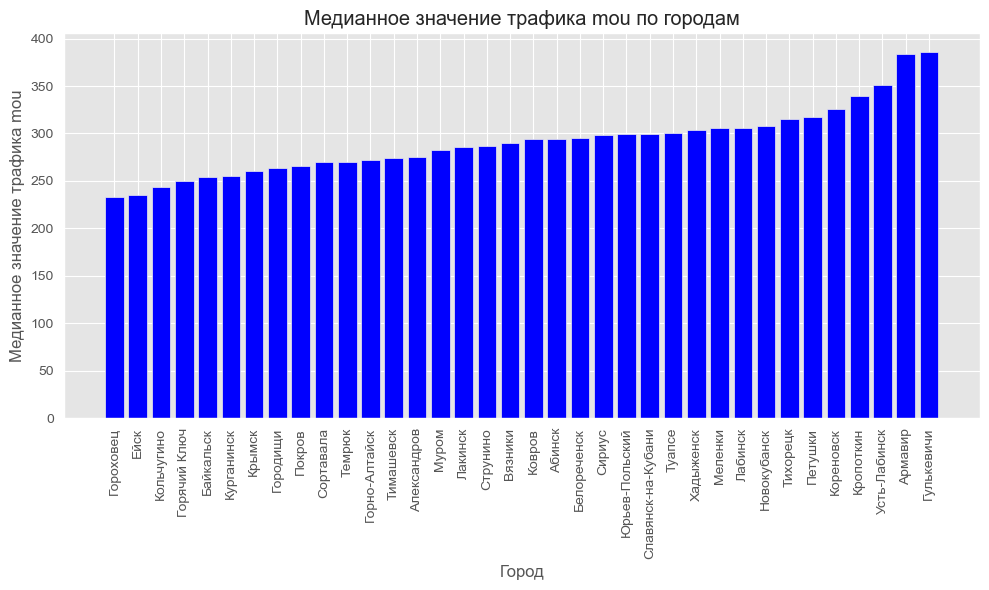

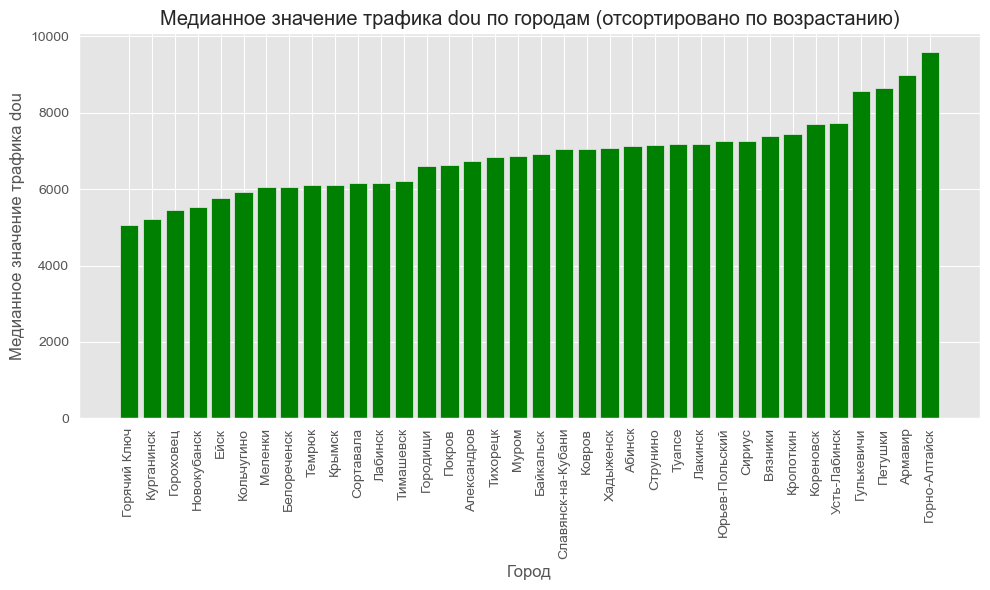

In [86]:
mou_median_by_city_2 = combined_dataframe_2.groupby('city')['mou'].median()


# Сортировка медианных значений трафика mou 
mou_median_by_city_sorted_2 = mou_median_by_city_2.sort_values()
# Построение гистограммы для медианных значений трафика mou
plt.figure(figsize=(10, 6))
plt.bar(mou_median_by_city_sorted_2.index, mou_median_by_city_sorted_2.values, color='blue')
plt.xlabel('Город')
plt.ylabel('Медианное значение трафика mou')
plt.title('Медианное значение трафика mou по городам')
plt.xticks(rotation=90)  # Поворот меток по оси X для лучшей читаемости
plt.tight_layout()
plt.show()

dou_median_by_city_2 = combined_dataframe_2.groupby('city')['dou'].median()
dou_median_by_city_sorted_2 = dou_median_by_city_2.sort_values()

# Построение гистограммы для медианных значений трафика dou
plt.figure(figsize=(10, 6))
plt.bar(dou_median_by_city_sorted_2.index, dou_median_by_city_sorted_2.values, color='green')
plt.xlabel('Город')
plt.ylabel('Медианное значение трафика dou')
plt.title('Медианное значение трафика dou по городам (отсортировано по возрастанию)')
plt.xticks(rotation=90)  # Поворот меток по оси X для лучшей читаемости
plt.tight_layout()
plt.show()

In [106]:
# Фильтруем исходный DataFrame по выбранным городам
chosen_cities_df_2 = combined_dataframe_2[combined_dataframe_2['city'].isin(chosen_cities)]

# Группируем данные по городу и месяцу для трафика mou для каждого года
mou_grouped_2021 = chosen_cities_df.groupby(['city', 'month'])['mou'].sum().reset_index()
mou_grouped_2022 = chosen_cities_df_2.groupby(['city', 'month'])['mou'].sum().reset_index()

# Группируем данные по городу и месяцу для трафика dou для каждого года
dou_grouped_2021 = chosen_cities_df.groupby(['city', 'month'])['dou'].sum().reset_index()
dou_grouped_2022 = chosen_cities_df_2.groupby(['city', 'month'])['dou'].sum().reset_index()


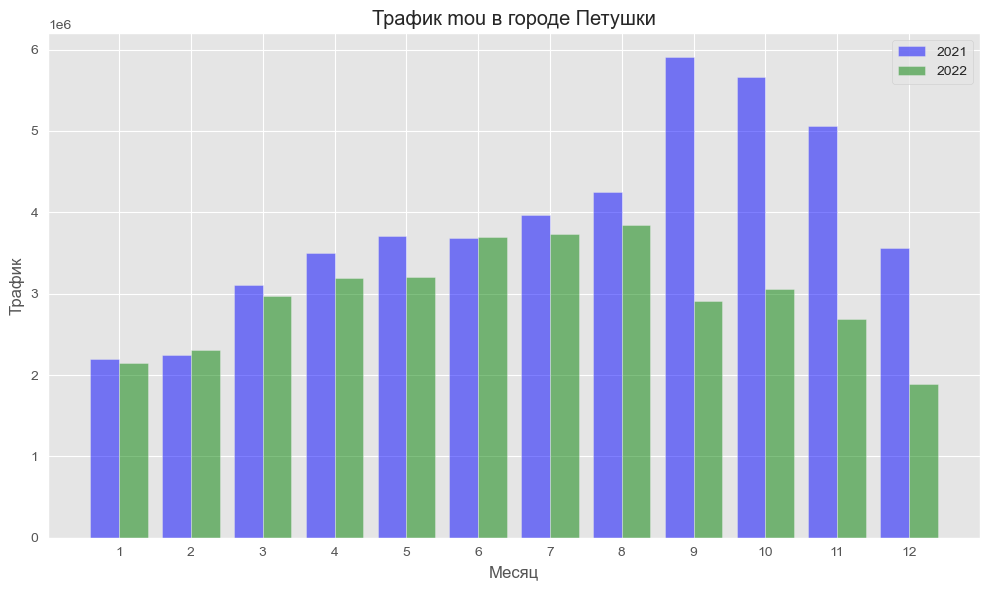

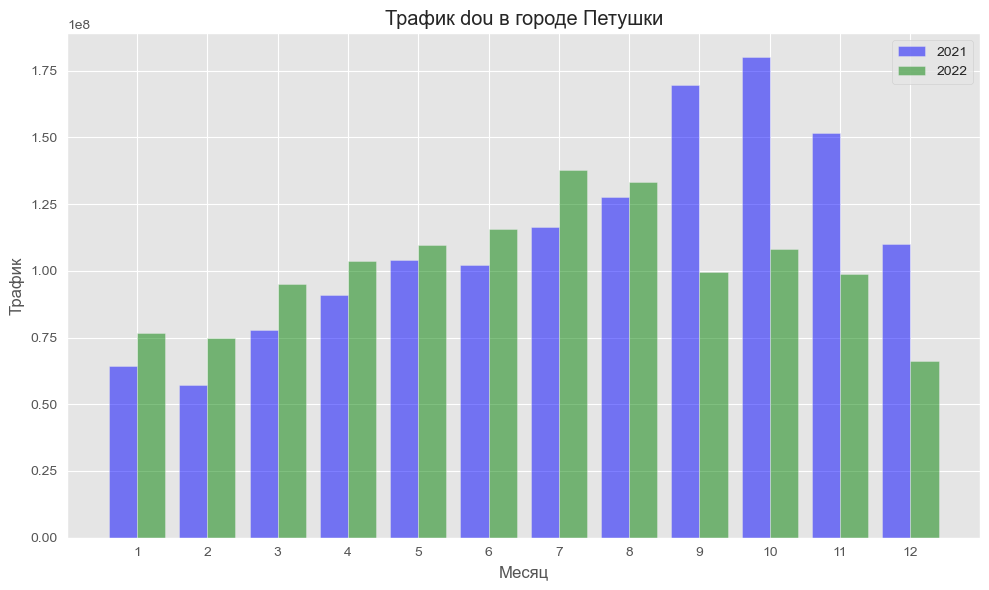

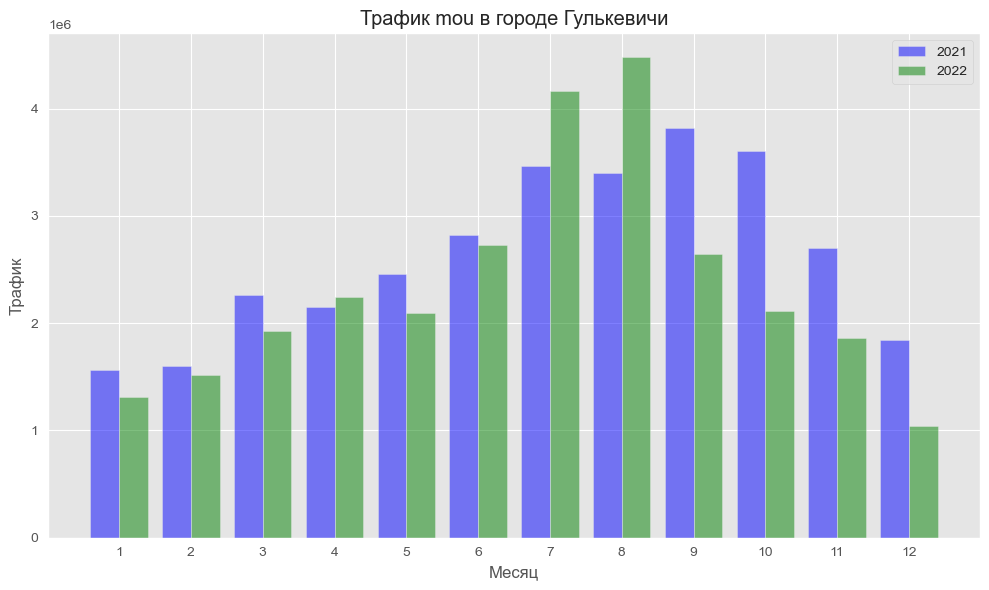

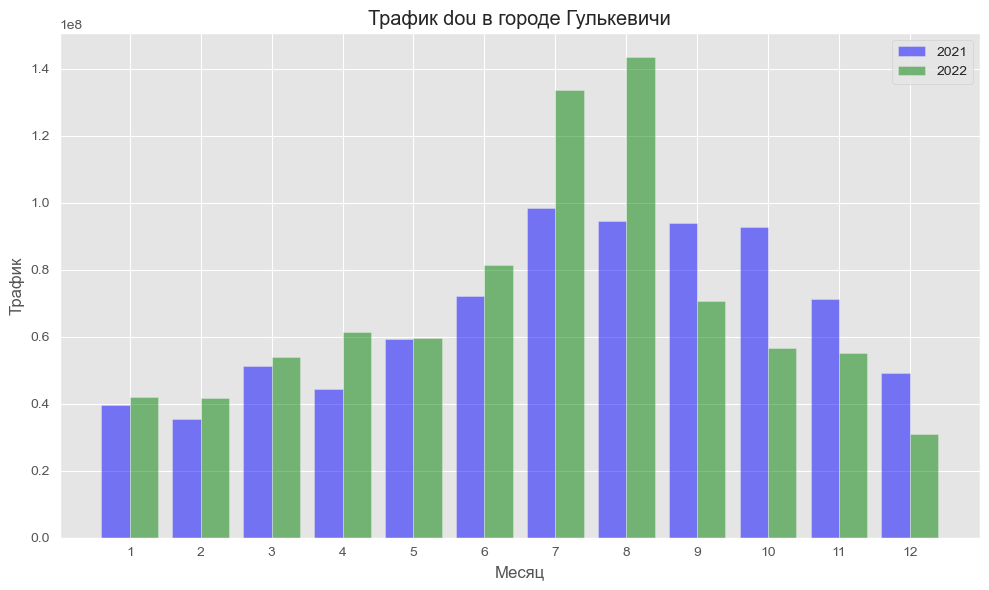

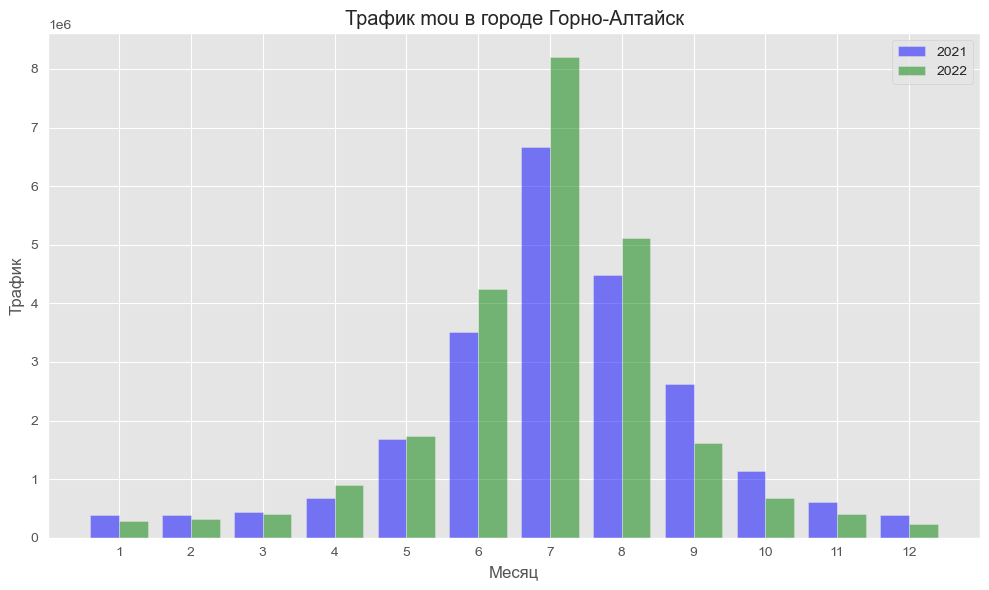

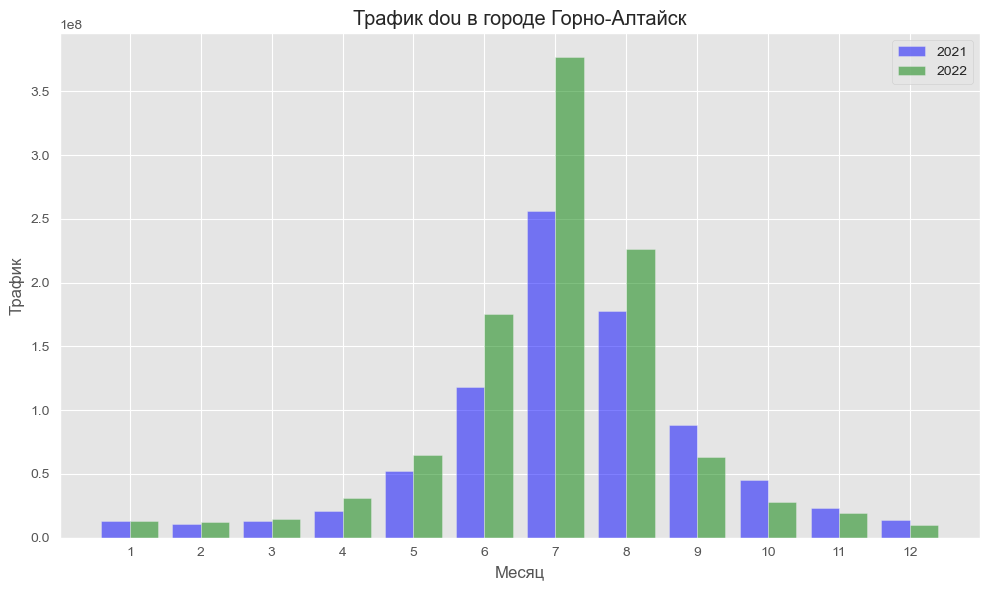

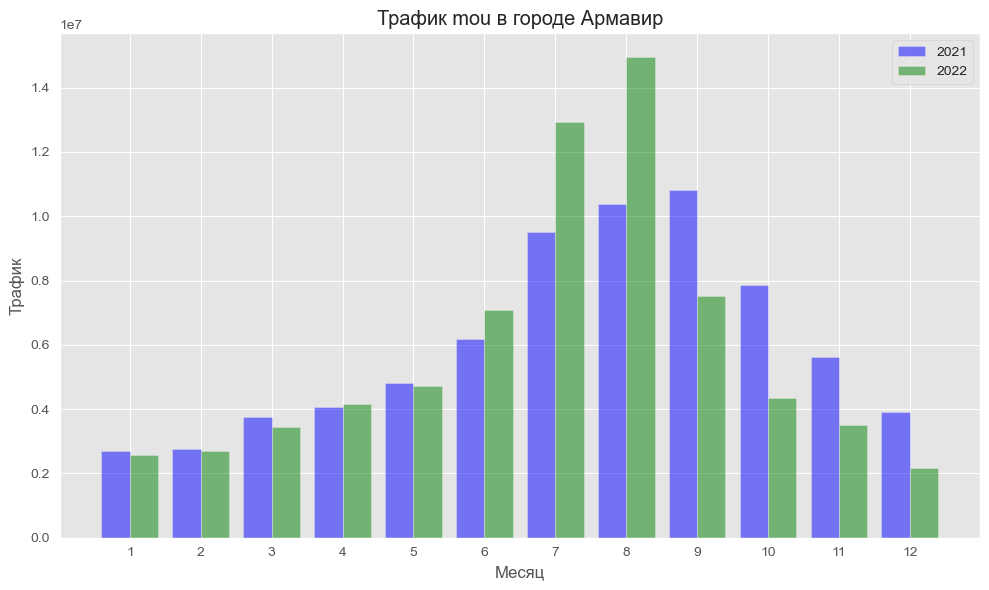

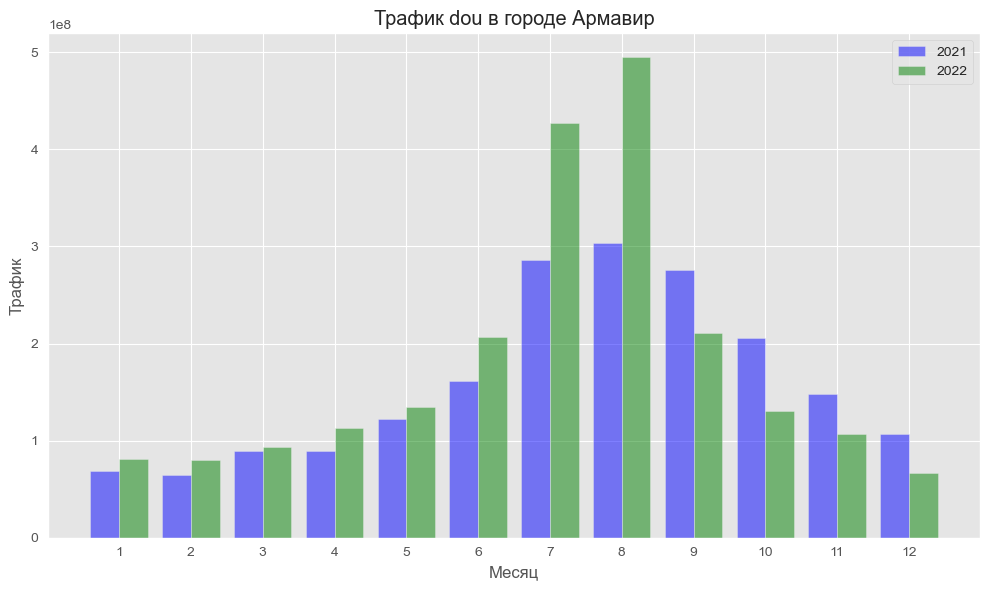

In [107]:
# Создаем массив для месяцев
months = np.arange(1, 13)

# Строим гистограммы для каждого города
for city in chosen_cities:
    # Фильтруем данные для текущего города и года
    city_mou_2021 = mou_grouped_2021[(mou_grouped_2021['city'] == city)]
    city_mou_2022 = mou_grouped_2022[(mou_grouped_2022['city'] == city)]

    city_dou_2021 = dou_grouped_2021[(dou_grouped_2021['city'] == city)]
    city_dou_2022 = dou_grouped_2022[(dou_grouped_2022['city'] == city)]

    # Создаем график для трафика mou
    plt.figure(figsize=(10, 6))
    plt.bar(city_mou_2021['month'] - 0.2, city_mou_2021['mou'], color='blue', alpha=0.5, width=0.4, label='2021')
    plt.bar(city_mou_2022['month'] + 0.2, city_mou_2022['mou'], color='green', alpha=0.5, width=0.4, label='2022')

    plt.xlabel('Месяц')
    plt.ylabel('Трафик')
    plt.title(f'Трафик mou в городе {city}')
    plt.xticks(months)  # Устанавливаем метки на оси X для каждого месяца
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Создаем график для трафика dou
    plt.figure(figsize=(10, 6))
    plt.bar(city_dou_2021['month'] - 0.2, city_dou_2021['dou'], color='blue', alpha=0.5, width=0.4, label='2021')
    plt.bar(city_dou_2022['month'] + 0.2, city_dou_2022['dou'], color='green', alpha=0.5, width=0.4, label='2022')

    plt.xlabel('Месяц')
    plt.ylabel('Трафик')
    plt.title(f'Трафик dou в городе {city}')
    plt.xticks(months)  # Устанавливаем метки на оси X для каждого месяца
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [112]:
from scipy.stats import mannwhitneyu

# Создаем список для хранения результатов теста Манна-Уитни для каждого города
mou_p_values = []
dou_p_values = []

# Применяем тест Манна-Уитни для каждого города отдельно
for city in chosen_cities:
    # Фильтруем данные для текущего города и года
    mou_2021 = chosen_cities_df[(chosen_cities_df['city'] == city)]['mou']
    mou_2022 = chosen_cities_df_2[(chosen_cities_df_2['city'] == city)]['mou']

    dou_2021 = chosen_cities_df[(chosen_cities_df['city'] == city)]['dou']
    dou_2022 = chosen_cities_df_2[(chosen_cities_df_2['city'] == city)]['dou']

    # Применяем тест Манна-Уитни
    statistic_mou, p_value_mou = mannwhitneyu(mou_2021, mou_2022)
    statistic_dou, p_value_dou = mannwhitneyu(dou_2021, dou_2022)

    mou_p_values.append(p_value_mou)
    dou_p_values.append(p_value_dou)

    # Выводим результаты теста для каждого города
    print(f"Тест Манна-Уитни для города {city} (mou): p-value = {p_value_mou}")
    print(f"Тест Манна-Уитни для города {city} (dou): p-value = {p_value_dou}")

    # Сравниваем средние значения p-value с уровнем значимости
    alpha = 0.05
    if p_value_mou < alpha:
        print("Существуют статистически значимые различия между данными за 2021 и 2022 годы по трафику mou.")
    else:
        print("Нет статистически значимых различий между данными за 2021 и 2022 годы по трафику mou.")
    
    if p_value_dou < alpha:
        print("Существуют статистически значимые различия между данными за 2021 и 2022 годы по трафику dou.")
    else:
        print("Нет статистически значимых различий между данными за 2021 и 2022 годы по трафику dou.")


Тест Манна-Уитни для города Петушки (mou): p-value = 3.7797700243669594e-52
Тест Манна-Уитни для города Петушки (dou): p-value = 2.841177902506792e-30
Существуют статистически значимые различия между данными за 2021 и 2022 годы по трафику mou.
Существуют статистически значимые различия между данными за 2021 и 2022 годы по трафику dou.
Тест Манна-Уитни для города Гулькевичи (mou): p-value = 2.027056196490854e-50
Тест Манна-Уитни для города Гулькевичи (dou): p-value = 8.980409471038905e-18
Существуют статистически значимые различия между данными за 2021 и 2022 годы по трафику mou.
Существуют статистически значимые различия между данными за 2021 и 2022 годы по трафику dou.
Тест Манна-Уитни для города Горно-Алтайск (mou): p-value = 4.5476607781887096e-17
Тест Манна-Уитни для города Горно-Алтайск (dou): p-value = 1.365244571703512e-92
Существуют статистически значимые различия между данными за 2021 и 2022 годы по трафику mou.
Существуют статистически значимые различия между данными за 2021 

In [ ]:
sample1 = 

In [87]:
from scipy.stats import mannwhitneyu

# Предположим, что у нас есть две выборки sample1 и sample2
# Нулевая гипотеза H0: медианные значения обеих выборок равны
# Альтернативная гипотеза H1: медианные значения выборок не равны

# Выполнение теста Манна-Уитни
statistic, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')

# Оценка значимости результата теста
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: медианные значения выборок различны")
else:
    print("Не отвергаем нулевую гипотезу: медианные значения выборок равны")


NameError: name 'sample1' is not defined